In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
train_d = '/content/drive/MyDrive/Brain/Train'
test_d = '/content/drive/MyDrive/Brain/Test'

In [3]:
batch_size = 64
img_height = 224
img_size=224

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_d,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_size,img_size),
  batch_size=batch_size,color_mode='grayscale')

Found 2720 files belonging to 2 classes.
Using 2040 files for training.


In [18]:
test_ds= tf.keras.utils.image_dataset_from_directory(
  test_d,
  seed=123,
  image_size=(img_size,img_size),color_mode='grayscale',batch_size=488)

Found 488 files belonging to 2 classes.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_d,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_size,img_size),
  batch_size=batch_size,color_mode='grayscale')

Found 2720 files belonging to 2 classes.
Using 680 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 1)
(64,)


In [9]:
model =  tf.keras.models.Sequential()
model.add( tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,1)))
model.add( tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add( tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add( tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add( tf.keras.layers.Flatten())
model.add( tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.5))
model.add( tf.keras.layers.Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=1e-5)
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy (from_logits=False), metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')

cb = checkpoint

In [12]:
history = model.fit(train_ds,epochs=10, validation_data=val_ds, callbacks = cb)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.5212 - accuracy: 0.7701
Epoch 1: val_accuracy improved from -inf to 0.78382, saving model to model_1.h5
32/32 [==============================] - 162s 5s/step - loss: 0.5212 - accuracy: 0.7701 - val_loss: 1.0442 - val_accuracy: 0.7838
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.8534
Epoch 2: val_accuracy improved from 0.78382 to 0.85441, saving model to model_1.h5
32/32 [==============================] - 12s 342ms/step - loss: 0.3384 - accuracy: 0.8534 - val_loss: 0.3966 - val_accuracy: 0.8544
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.2652 - accuracy: 0.8907
Epoch 3: val_accuracy improved from 0.85441 to 0.89118, saving model to model_1.h5
32/32 [==============================] - 12s 341ms/step - loss: 0.2652 - accuracy: 0.8907 - val_loss: 0.3008 - val_accuracy: 0.8912
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 0.2282 - a

In [19]:
predictions = np.array([])
labels =  np.array([])
i=0;
for x, y in test_ds:
    i+=1
    z=model.predict(x)
    xx = np.round(z)
    prediction=np.concatenate([predictions,xx[:,-1]])
    labels = np.concatenate([labels, y.numpy()])

In [20]:
evaluation = model.evaluate(test_ds, return_dict=True)

1/1 [==============================] - 16s 16s/step - loss: 0.1784 - accuracy: 0.9385


In [21]:
import sklearn
print(sklearn.metrics.classification_report(prediction,labels))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       249
         1.0       0.93      0.95      0.94       239

    accuracy                           0.94       488
   macro avg       0.94      0.94      0.94       488
weighted avg       0.94      0.94      0.94       488



In [22]:
labels

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0.

In [23]:
prediction

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0.

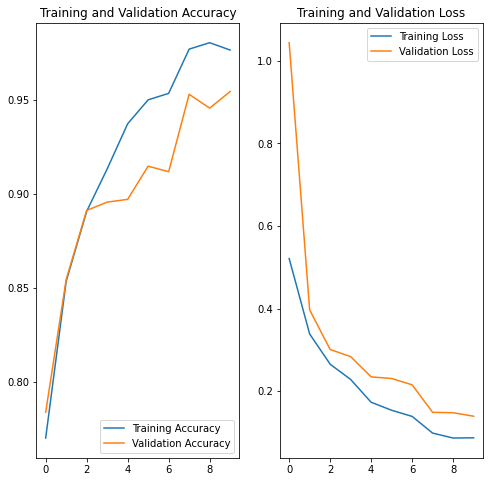

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

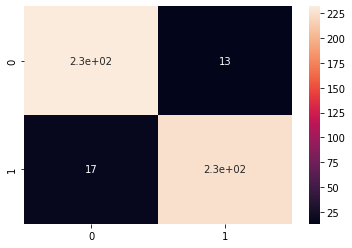

In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels,prediction)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)